In [1]:
from BKG_Dataholder import BKG_dataholder
from Coll_Data_Aug import Coll_Data_Augmentator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import os
import json
import time,datetime
import tables as t

%matplotlib inline

In [2]:
COLLIMATOR_VARIABLES = [        
        ":SET_LD",
        #":SET_LU",
        ":SET_RD",
        #":SET_RU"
        ]

COLL_COLLORS = {
        "TCTPH.4L5.B1":"firebrick",
        "TCTPH.4R5.B2":"firebrick",
        "TCTPV.4L5.B1":"black",
        "TCTPV.4R5.B2":"black",
        'TCL.4R5.B1':"violet", 
        'TCL.5R5.B1':"firebrick",
        'TCL.6R5.B1':"green", 
        'TCL.4L5.B2':"violet", 
        'TCL.5L5.B2':"firebrick", 
        'TCL.6L5.B2':"green"

}


COLLIMATOR_PATH = "/home/mirksonius/Desktop/Fill_info/collimators/"

BEAM_PATH = "/home/mirksonius/Desktop/Fill_info/beam/"


FILL_PATH = "/home/mirksonius/Desktop/22_fills/"
FILL_NUMBER =  7886



In [3]:

COLLIMATOR_COLORS = ["mediumslateblue","red","black","darkviolet","lightcoral"]

BEFORE_IP = [
    "TCTPH.4L5.B1",
    "TCTPH.4R5.B2",
    "TCTPV.4L5.B1",
    "TCTPV.4R5.B2"
    ]



def get_xlabels(timestamps):
    dates = []
    for t in timestamps:
        #d = datetime.datetime.fromtimestamp(t)
        d = datetime.datetime.utcfromtimestamp(t)
        dates.append(
            
            datetime.time(hour = d.hour,
                            minute= d.minute,
                            second= d.second,
                                )
        )
    
    return dates


def get_exp_mean(signal,alpha:float = 1e-3):
    """
    signal: iterable on which the exponential average should be
    calculated on
    alpha: importance of new value  
    """
    N = len(signal)
    expavg = signal[0]
    res = [expavg]
    for i in range(1,N):
        expavg = alpha * signal[i] + (1-alpha)*expavg
        res.append(expavg)
    return res




In [10]:
FILL_NUMBER =  8099

bkg = BKG_dataholder(
    fill_path= FILL_PATH,
    fill_number= FILL_NUMBER,
    collimator_path= COLLIMATOR_PATH,
    beam_path = BEAM_PATH
)

bkg.get_beam_data()
bkg.get_fill_data()
bkg.collimator_variables = COLLIMATOR_VARIABLES
bkg.get_collimator_data()

start_plot = start_plot = int(bkg.beam_mode["timestamp"].loc[bkg.beam_mode["mode"] == "INJPHYS"].values[0])

end_plot = bkg.fill_end

Opening file 8099_356916_2208060210_2208060231.hd5
File 8099_356916_2208060210_2208060231.hd5 starts at 2022-08-06 02:30:33 and ends at 2022-08-06 02:34:13
Opening file 8099_356917_2208060231_2208060340.hd5
File 8099_356917_2208060231_2208060340.hd5 starts at 2022-08-06 02:34:15 and ends at 2022-08-06 03:41:41
Opening file 8099_356918_2208060340_2208060343.hd5
File 8099_356918_2208060340_2208060343.hd5 starts at 2022-08-06 03:41:42 and ends at 2022-08-06 03:45:50
Opening file 8099_356919_2208060343_2208060432.hd5
File 8099_356919_2208060343_2208060432.hd5 starts at 2022-08-06 03:45:51 and ends at 2022-08-06 04:35:08


In [5]:
print(
    "collidable:",len(bkg.get_colliding_bunches()),
    "non 1: ",len(bkg.get_noncolliding_bunches(1,2)),
    "non 2:",len(bkg.get_noncolliding_bunches(2,1)))
print(bkg.fill_start_dt)

collidable: 1922 non 1:  13 non 2: 13
2022-08-06 01:47:07


## Collimator data augmentation

In [6]:
cda = Coll_Data_Augmentator(
    coll_dict =bkg.coll_dict,
    before_ip =BEFORE_IP,
    beam_1 = bkg.collimators_b1, 
    beam_2 = bkg.collimators_b2,
    times =bkg.times,
    variables = COLLIMATOR_VARIABLES)
 
 
 
                        
vert = cda.get_vertical()
hor = cda.get_horizontal()
scr = cda.get_scrapers()
area1 = cda.area(1)
area2 = cda.area(2)

cda.coll_dict

{'TCTPH.4L5.B1': {'TCTPH.4L5.B1:SET_LD':          timestamp  position
  0     1.659753e+09      6.82
  1     1.659753e+09      6.82
  2     1.659753e+09      6.82
  3     1.659753e+09      6.82
  4     1.659753e+09      6.82
  ...            ...       ...
  5126  1.659761e+09     25.00
  5127  1.659761e+09     25.00
  5128  1.659761e+09     25.00
  5129  1.659761e+09     25.00
  5130  1.659761e+09     25.00
  
  [5131 rows x 2 columns],
  'TCTPH.4L5.B1:SET_RD':          timestamp  position
  0     1.659753e+09   -11.905
  1     1.659753e+09   -11.905
  2     1.659753e+09   -11.905
  3     1.659753e+09   -11.905
  4     1.659753e+09   -11.905
  ...            ...       ...
  5126  1.659761e+09   -25.000
  5127  1.659761e+09   -25.000
  5128  1.659761e+09   -25.000
  5129  1.659761e+09   -25.000
  5130  1.659761e+09   -25.000
  
  [5131 rows x 2 columns]},
 'TCTPV.4L5.B1': {'TCTPV.4L5.B1:SET_LD':          timestamp  position
  0     1.659753e+09      6.24
  1     1.659753e+09      6.24
 

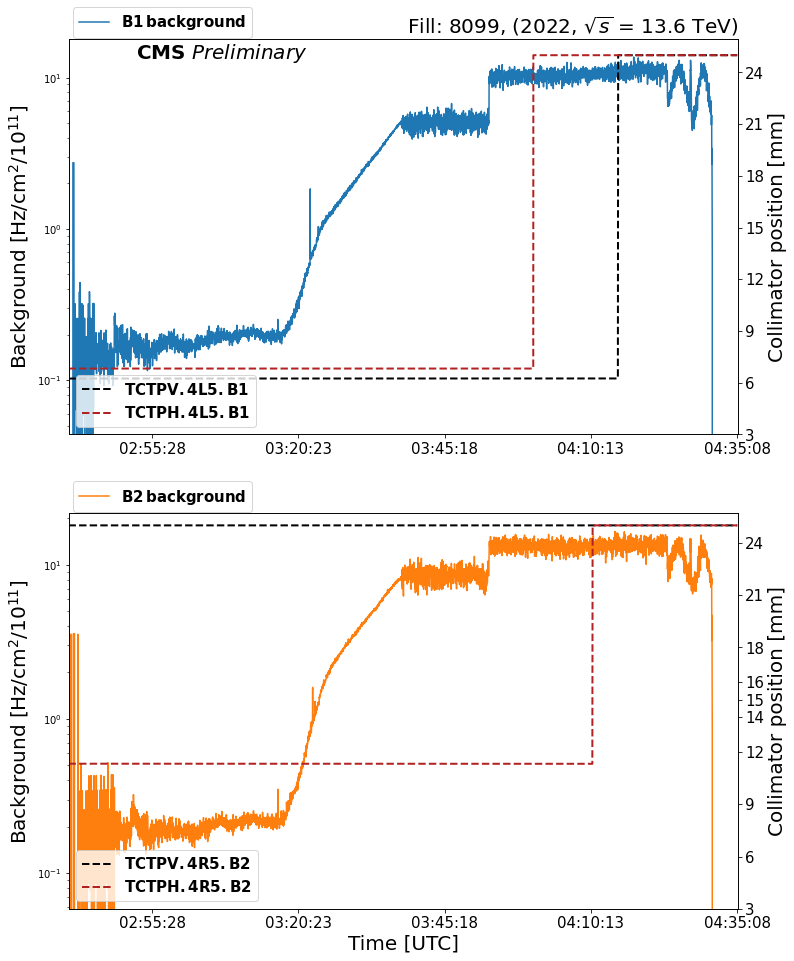

In [11]:


sqrt_s = (bkg.energy_b1["value"].values.max() + bkg.energy_b2["value"].values.max())/1000
sqrt_s

frame, fig = plt.subplots(2,1,figsize =(12,16))

#Plotting background
fig[0].plot(bkg.times,bkg.plusz,label = r"$\bf{B1\,background}$")
fig[1].plot(bkg.times,bkg.minusz,color = "tab:orange",label = r"$\bf{B2\,background}$")
tw0 = fig[0].twinx()
tw1 = fig[1].twinx()


#area_ax = fig[0].twinx()
#area_ax.plot(bkg.times,area1,color = "black")
coll_start = 0#int(1e-2*len(bkg.times))
lw = 2
for v in vert.keys():
    if v in cda.beam1:
        tw0.plot(vert[v]["timestamp"][coll_start:],vert[v]["position"][coll_start:],
        linestyle = "--",color =  COLL_COLLORS[v],linewidth = lw,label = r"$\bf{0}$".format(v))
    else:
        tw1.plot(vert[v]["timestamp"][coll_start:],vert[v]["position"][coll_start:],
        linestyle = "--",color =  COLL_COLLORS[v],linewidth = lw,label = r"$\bf{0}$".format(v))


for h in hor.keys():
    if h in cda.beam1:
        tw0.plot(hor[h]["timestamp"][coll_start:],hor[h]["position"][coll_start:],
        linestyle = "--",color = COLL_COLLORS[h],linewidth = lw,label = r"$\bf{0}$".format(h))
    else:
        tw1.plot(hor[h]["timestamp"][coll_start:],hor[h]["position"][coll_start:],
        linestyle = "--",color = COLL_COLLORS[h],linewidth = lw,label = r"$\bf{0}$".format(h))


#Figure settings
t0 = bkg.times[0]
t1 = bkg.times[-1]
ticks = np.linspace(t0,t1,6,endpoint=True,dtype="int")
lab = get_xlabels(ticks)
for f in fig:
    f.set_yscale("log")
    f.set_xticks(ticks)
    f.set_xticklabels(lab,fontsize = 15)
    f.set_xlim(start_plot,end_plot)
    f.legend(fontsize = 15,bbox_to_anchor = (0.135,1.1,0.15,0))#loc = "upper center")
    f.set_ylabel(r"Background [Hz/cm$^2$/10$^{11}$]",fontsize = 20)

x = 0.1
y = 0.95
plt.text(x,y, r"$\bf{CMS}$ $\it{Preliminary}$",fontsize = 20, transform=fig[0].transAxes)


tw0.legend(fontsize = 15,loc = "lower left")
tw0.set_ylabel("Collimator position [mm]",fontsize = 20)
tw1.legend(fontsize = 15,loc = "lower left")
tw1.set_ylabel("Collimator position [mm]",fontsize = 20)


fig[0].set_title(f"Fill: {bkg.fill_number}, (2022, " + r"$\sqrt{s}$" + " = {:.1f} TeV)".format(sqrt_s) ,
loc = "right", fontsize = 20,)
fig[1].set_xlabel("Time [UTC]", fontsize = 20)

yticks = [3,6,9,12,15,18,21,24]
tw0.set_yticks(yticks)
tw0.set_yticklabels(yticks,fontsize = 15)
tw1.set_yticks(yticks + [14,16])
tw1.set_yticklabels(yticks + [14,16],fontsize = 15)



plt.savefig("{}_vh.png".format(bkg.fill_number))

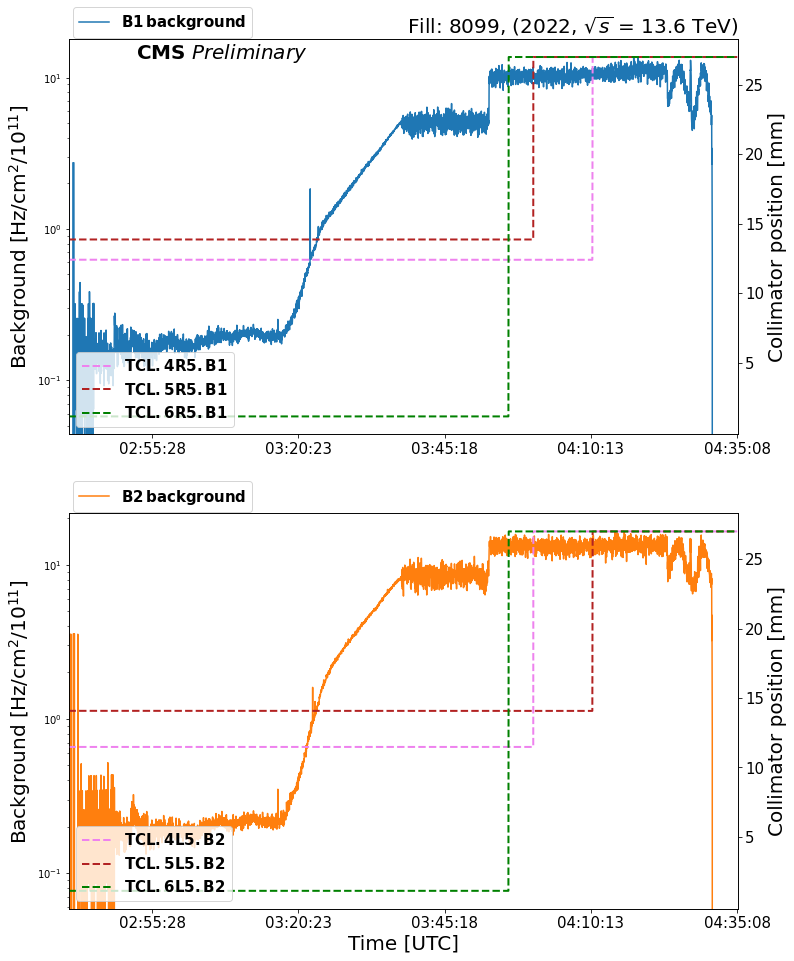

In [12]:



frame, fig = plt.subplots(2,1,figsize =(12,16))

#Plotting background
fig[0].plot(bkg.times,bkg.plusz,label = r"$\bf{B1\,background}$")
fig[1].plot(bkg.times,bkg.minusz,color = "tab:orange",label = r"$\bf{B2\,background}$")
tw0 = fig[0].twinx()
tw1 = fig[1].twinx()

for s in scr.keys():
    if s in cda.beam1:
        tw0.plot(scr[s]["timestamp"][coll_start:],scr[s]["position"][coll_start:],
        linestyle = "--",color = COLL_COLLORS[s],linewidth = lw,label = r"$\bf{0}$".format(s))
    else:
        tw1.plot(scr[s]["timestamp"][coll_start:],scr[s]["position"][coll_start:],
        linestyle = "--",color = COLL_COLLORS[s],linewidth = lw, label = r"$\bf{0}$".format(s))



#Figure settings
t0 = bkg.times[0] 
t1 = bkg.times[-1] 
ticks = np.linspace(t0,t1,6,endpoint=True,dtype="int")
lab = get_xlabels(ticks)
for f in fig:
    f.set_yscale("log")
    f.set_xticks(ticks)
    f.set_xticklabels(lab,fontsize = 15)
    f.set_xlim(start_plot,end_plot)
    f.legend(fontsize = 15,bbox_to_anchor = (0.135,1.1,0.15,0))
    f.set_ylabel(r"Background [Hz/cm$^2$/10$^{11}$]",fontsize = 20)

x = 0.1
y = 0.95
plt.text(x,y, r"$\bf{CMS}$ $\it{Preliminary}$",fontsize = 20, transform=fig[0].transAxes)
yticks = [5,10,15,20,25]
tw0.set_yticks(yticks)
tw0.set_yticklabels(yticks,fontsize = 15)
tw1.set_yticks(yticks)
tw1.set_yticklabels(yticks,fontsize = 15)


tw0.legend(fontsize = 15,loc = "lower left")
tw0.set_ylabel("Collimator position [mm]",fontsize = 20)
tw1.legend(fontsize = 15,loc = "lower left")
tw1.set_ylabel("Collimator position [mm]",fontsize = 20)
fig[0].set_title(f"Fill: {bkg.fill_number}, (2022, " + r"$\sqrt{s}$" + " = {:.1f} TeV)".format(sqrt_s) ,
loc = "right", fontsize = 20,)
fig[1].set_xlabel("Time [UTC]", fontsize = 20)
plt.savefig("{}_scapers.png".format(bkg.fill_number))

# Fill notes:
### 7825 Important fill
Most usefull actually can plot running average and area
### 7885
Collimators kept in one position for the entire time of bcm1f recording
### 7963
Enormous file: almost 12 hour long fill, a lot of background data but little collimator movement. Beam squeezeing occured.

### 7882
No beam adjustment, only squeeze. Nice corellation between collimator position and background
### 7884
No beam adjustment,or collimator movement. max energy: 13.6 TeV

### 7886 Important fill
Two beam injectons according to timber beam modes <br>
Two adjustments, max energy: 13.6 TeV


### 7889
Has beam adjust

### Quantifying collimator configuration
Calculate exponential moving average over beam adjust period.
Mean over the adjust period. Compare with other variables (e.g. vacuum).
For collimators before IP -> look at collmator area.
What to do with  scraping collimators?

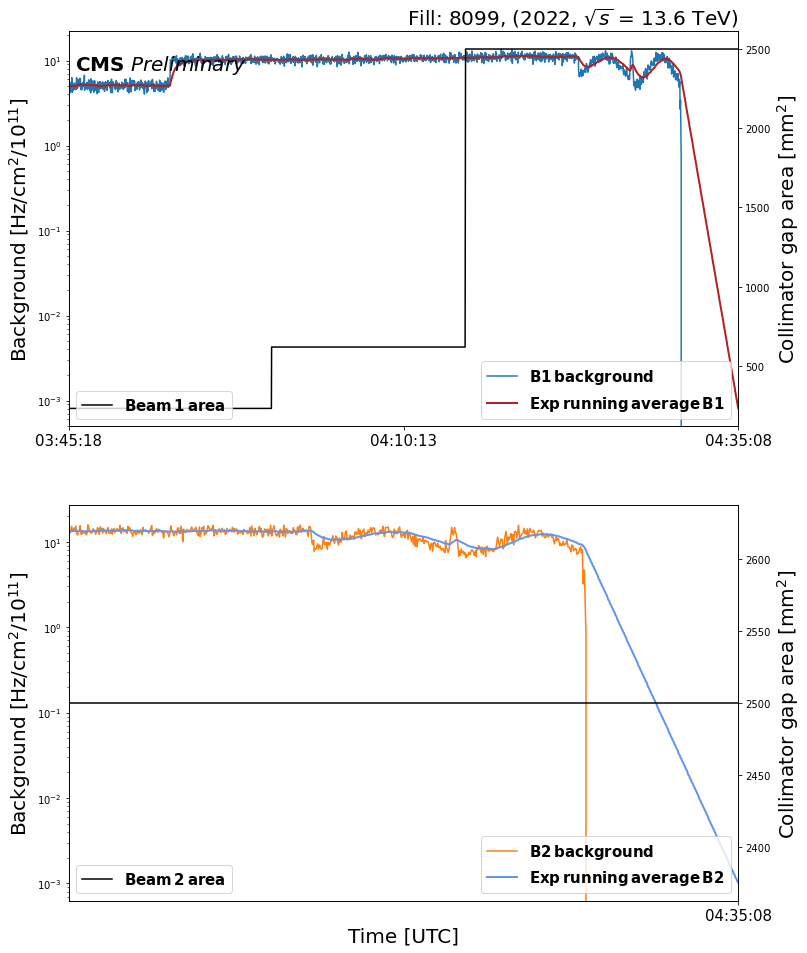

In [9]:
sqrt_s = (bkg.energy_b1["value"].values.max() + bkg.energy_b2["value"].values.max())/1000
sqrt_s
a = 5e-2
coll_start1 = int(0.6*len(bkg.times))
coll_start2 = int(0.85*len(bkg.times))

plusz_mean = get_exp_mean(bkg.plusz,alpha = a)
minusz_mean = get_exp_mean(bkg.minusz,alpha = a)

frame, fig = plt.subplots(2,1,figsize =(12,16))

#Plotting background
fig[0].plot(bkg.times[coll_start1:],bkg.plusz[coll_start1:],label = r"$\bf{B1\,background}$")
fig[0].plot(bkg.times[coll_start1:],plusz_mean[coll_start1:],label =r"$\bf{Exp\,running\,average\,B1}$",
color = "firebrick",linewidth = 2)
fig[1].plot(bkg.times,bkg.minusz,color = "tab:orange",label = r"$\bf{B2\,background}$")

fig[1].plot(bkg.times,minusz_mean,label =r"$\bf{Exp\,running\,average\,B2}$",
color = "cornflowerblue",linewidth = 2)


tw0 = fig[0].twinx()
tw1 = fig[1].twinx()


#area_ax = fig[0].twinx()
#area_ax.plot(bkg.times,area1,color = "black")
lw = 2
tw0.plot(bkg.times[coll_start1:],area1[coll_start1:],
color = "black",label = r"$\bf{Beam\, 1\, area}$",linewidth = 1.5)


tw1.plot(bkg.times[coll_start2:],area2[coll_start2:],
color = "black",label = r"$\bf{Beam\, 2\, area}$",linewidth = 1.5)
#Figure settings
t0 = bkg.times[0]
t1 = bkg.times[-1]
ticks = np.linspace(t0,t1,6,endpoint=True,dtype="int")
lab = get_xlabels(ticks)
coll_start = [coll_start1,coll_start2]
for i,f in enumerate(fig):
    f.set_yscale("log")
    f.set_xticks(ticks)
    f.set_xticklabels(lab,fontsize = 15)
    f.set_xlim(bkg.times[coll_start[i]],t1)
    f.legend(fontsize = 15,loc = "lower right")
    f.set_ylabel(r"Background [Hz/cm$^2$/10$^{11}$]",fontsize = 20)
x = 0.01
y = 0.9
plt.text(x,y, r"$\bf{CMS}$ $\it{Preliminary}$",fontsize = 20, transform=fig[0].transAxes)


tw0.legend(fontsize = 15,loc = "lower left")
tw0.set_ylabel(r"Collimator gap area [mm$^2$]",fontsize = 20)
tw1.legend(fontsize = 15,loc = "lower left")
tw1.set_ylabel(r"Collimator gap area [mm$^2$]",fontsize = 20)


fig[0].set_title(f"Fill: {bkg.fill_number}, (2022, " + r"$\sqrt{s}$" + " = {:.1f} TeV)".format(sqrt_s) ,
loc = "right", fontsize = 20,)
fig[1].set_xlabel("Time [UTC]", fontsize = 20)


plt.savefig("{}_closeup.png".format(bkg.fill_number))